### Logistic Regression

in this notebook, we are going to implement a **clssification** using **logistic regression** model that is implemented from scratch.

**logistic regression** is a classification model that is very easy to implement and performs very well on linearly seperable classes. similar to **perceptron** and **Adaline**, **logistic regression** model is also a linear model for binary classification.

for the sake of illustration, we plot the **sigmoid** function (which acts as **activation** function in **Logisitc Regression**) for some values in range -7 to 7.

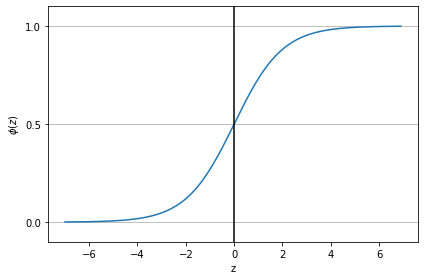

In [2]:
import matplotlib.pyplot  as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
#ax.xaxis.grid(True)
plt.tight_layout()
plt.show()

in the next cell we are going to plot the cost of classifying a single training example for different values of **$\phi$(x)** ( **$\phi$(x)** is sigmoid function ).

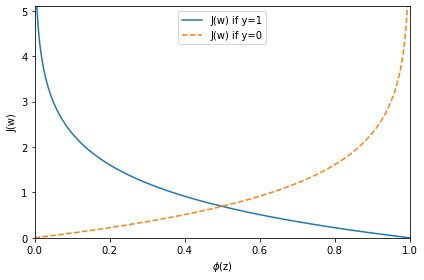

In [3]:
def cost_1(z) : 
    return - np.log(sigmoid(z))
def cost_0(z) :
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

to implement logistic regression from scrathc, we can use the class of Adaline, the only difference is the cost function of the class that is implemented by `fit` method, and also we need to swap the **linear activation** function with the **sigmoid activation** function and change the threshold function to return class label 0 and 1, instead of -1 and 1. if we make those changes to the Adaline code, we will end up with a working logistic regression implementation :

In [4]:
class LogisticRegressionGD(object):

    """Logistic Regression Classifier using gradient descent.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight
    initialization.
    
    
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Logistic cost function value in each epoch.
    """

    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of
            examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.

        Returns
        -------
        self : object
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            # note that we compute the logistic 'cost' now
            # instead of the sum of squared errors cost
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


when we fit a logistic regression model, we have to keep in mind that it only works for binary classifcation tasks. so, let's consider only **Iris-setosa** and **Iris-versicolor** flowers(class 0 and 1) and check that our implementation of logistic regression works:

In [5]:
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('class labels :', np.unique(y))

class labels : [0 1 2]


In [6]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [7]:
print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[50 50 50]
[35 35 35]
[15 15 15]


In [8]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)

lrgd.fit(X_train_01_subset, y_train_01_subset)


In [18]:
print(len(X_train[(y_train == 0) | (y_train == 1)]))

print((y_train == 0) | (y_train == 1))

print(len(y_train))


70
[ True  True False False  True False False  True False False False False
  True False False False  True False False  True False False False False
 False False False False False False False  True False False False False
 False False False  True False  True False  True  True False  True  True
 False False  True False False  True  True  True False False  True False
  True False False  True  True False False False False False False False
 False False False False  True  True False False False False  True False
 False False  True  True False  True False False False False  True False
 False  True  True False  True False  True  True  True]
[False False False False False False False False False  True  True  True
 False  True  True False False  True  True False False False  True  True
  True False  True False False False  True False False False False False
  True False False False False False False False False  True False False
 False  True False  True  True False False False  True False Fals